# SETUP

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
from keras.models import load_model
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import tensorflow_datasets as tfds

tf.keras.backend.set_floatx("float64")

GPU device not found
Found GPU at: 


# Dataset Loading

This cell instantiates a data loader class, which is used for handling the dataset. A preproccesed image and segmentation dataset is loaded with the specified configurations.

In [2]:
dataset = "birds"
test_size=300
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()
cardinality = int(img_ds.cardinality())

img_test = img_ds.take(test_size)
seg_test = seg_ds.take(test_size)
img_train = img_ds.skip(test_size)
seg_train = seg_ds.skip(test_size)    

# Activation Functions

These are possible activation functions that could be used. I couldn't get them working properly but they can be used to regularise the input if implemented correctly.

In [3]:
def scaledtanh(x): 
    return tf.math.tanh(x*0.1)

def scaledatanh(x):
    return tf.math.atanh(x)*10

# Image PCWN Training
This cell trains a PCWN for the image dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filer4kyoqbu.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filer4kyoqbu.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
saving to: models/birds_img
out.shape (1, 8, 8, 65)
keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 k

array([[[0.14617585, 0.33376729, 0.66444045],
        [0.12103343, 0.34115589, 0.66089183],
        [0.10739339, 0.33724773, 0.65350366],
        ...,
        [0.10977735, 0.34653535, 0.65062261],
        [0.13595881, 0.34088519, 0.66575283],
        [0.113804  , 0.33460143, 0.65667057]],

       [[0.13599879, 0.33447769, 0.66085112],
        [0.11702235, 0.34436202, 0.65255898],
        [0.10582587, 0.34229904, 0.65602142],
        ...,
        [0.12352391, 0.34479719, 0.66356254],
        [0.13491067, 0.33996677, 0.66709584],
        [0.12738803, 0.33749473, 0.65952247]],

       [[0.14441565, 0.32729781, 0.65441871],
        [0.10588427, 0.34210733, 0.65536898],
        [0.11953747, 0.32794836, 0.65027171],
        ...,
        [0.11631841, 0.35211399, 0.66566283],
        [0.12237118, 0.3486838 , 0.65677875],
        [0.12824206, 0.33799833, 0.65435457]],

       ...,

       [[0.14506453, 0.34856698, 0.67301553],
        [0.14242782, 0.35439765, 0.67077637],
        [0.11535142, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  24.834967028314182
ncc =  [[1.         0.96647657]
 [0.96647657 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.52089268 0.596977   0.7534613  0.52672887]
 [0.52298254 0.60304487 0.73440039 0.53138334]
 [0.62480038 0.60099214 0.69814146 0.59327519]
 [0.68952042 0.57972914 0.65076667 0.68518668]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.49901077 0.48523798 0.52611208 0.52529712]
 [0.48843202 0.49370123 0.50764901 0.48967744]
 [0.50931724 0.5052845  0.52243667 0.52488797]
 [0.50131031 0.49771612 0.5237402  0.52474944]], shape=(4, 4), dtype=float64)


(24.834967028314182,
 array([[1.        , 0.96647657],
        [0.96647657, 1.        ]]))

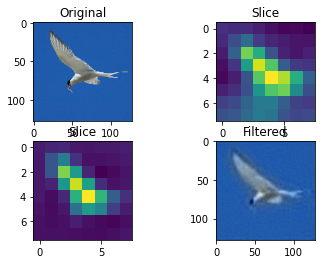

In [4]:
model_name = "img"
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_test)

# Segmentation PCWN Training
This cell trains a PCWN for the segmentation dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
saving to: models/birds_seg
out.shape (1, 8, 8, 65)
keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype

array([[[0.29596499, 0.26391843, 0.23917428],
        [0.25660065, 0.21070772, 0.20880654],
        [0.18521658, 0.17876096, 0.15516143],
        ...,
        [0.23127322, 0.22839235, 0.212292  ],
        [0.25894943, 0.22954461, 0.17632937],
        [0.38916352, 0.33631593, 0.28713235]],

       [[0.32881436, 0.25430456, 0.22803308],
        [0.2392619 , 0.21302085, 0.18179119],
        [0.16251676, 0.16803697, 0.14349797],
        ...,
        [0.26750368, 0.2805858 , 0.25723183],
        [0.22892134, 0.22239535, 0.19221263],
        [0.26836872, 0.24080883, 0.20073362]],

       [[0.22377403, 0.20617341, 0.16119744],
        [0.20969814, 0.18567158, 0.15504965],
        [0.1562347 , 0.17862405, 0.16182192],
        ...,
        [0.36732537, 0.37231925, 0.37030604],
        [0.26639527, 0.30389237, 0.28036296],
        [0.21610729, 0.2270685 , 0.20564564]],

       ...,

       [[0.52635622, 0.56809205, 0.27618721],
        [0.61204743, 0.67088771, 0.50050002],
        [0.47171608, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  19.685264497254643
ncc =  [[1.      0.89653]
 [0.89653 1.     ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.45606667 0.43544897 0.44316286 0.50956362]
 [0.3917959  0.3557598  0.33738369 0.42185801]
 [0.42087594 0.42049921 0.39062956 0.35883552]
 [0.43789828 0.45650873 0.4525685  0.3996017 ]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.46067729 0.43534522 0.4264995  0.39957057]
 [0.44027327 0.42253777 0.40685212 0.38793712]
 [0.46437133 0.46920351 0.44728953 0.42010374]
 [0.47394865 0.49906076 0.48183911 0.43325368]], shape=(4, 4), dtype=float64)


(19.685264497254643,
 array([[1.     , 0.89653],
        [0.89653, 1.     ]]))

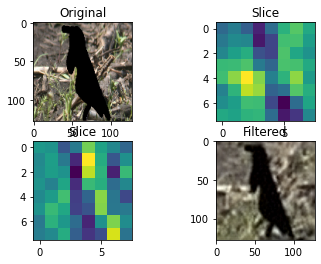

In [5]:
model_name = "seg"
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()
seg_broker.check_build(seghead,seginvhead,seg_test)

# Linear Least Squares Training (Convolutional)

The following cells are used to find a matrix A and vector b which are used to map the image decomposition onto a segmentation decomposition.

In [6]:
shape = imghead(next(iter(img_train))[0]).shape #Records the image decompositon shape

In [7]:

shape_0 = shape[3] #this is the channels of the decomposition
shape_1 = shape[1]*shape[2] #this is the height*width of the decompostion
shape_2 = shape[1] #this is the height of the decomposition

In [8]:
reconstruct = next(iter(seg_train))[0].shape #the shape that the segmentation will take

In [9]:
n = 0.0

xxt = np.zeros([shape_0,shape_0]) #Initialsed matrix used to find eigen
yxt = np.zeros([shape_0,shape_0]) #Initialsed covariance matrix between image decomposition and segmentation decomposition
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(seg_train.cardinality()))

for item in iter(zip(img_train,seg_train)):
    bar.update(1)
    image = item[0][0]
    segmentation = item[1][0]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/5733 [00:00<?, ?it/s]

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [10]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [11]:
inverse_xxt = tf.linalg.pinv(xxt)

In [12]:
A = tf.matmul(inverse_xxt,yxt)

In [13]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [14]:
A_filter = tf.reshape(A,(1,1,shape_0,shape_0)) 

In [15]:
def iou_coef(y_true, y_pred,smooth=1):
  intersection = tf.reduce_sum(y_true * y_pred, 0)
  union = tf.reduce_sum(y_true,0)+tf.reduce_sum(y_pred,0)-intersection
  iou = tf.reduce_mean((intersection+1) / (union+1), 0)
  return float(iou)

In [16]:
def dice_coef(y_true, y_pred,smooth=1):
    y_true_f = tf.reshape(y_true,-1)
    y_pred_f =tf.reshape(y_pred,-1)
    intersection = tf.reduce_sum(y_true_f * y_pred_f,0)

    return float((2. * intersection+smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)+smooth))

0.34185848252344414
0.27650517049144224


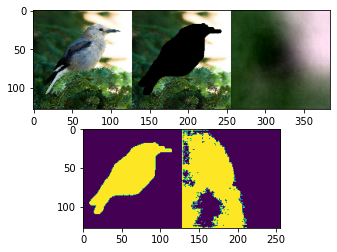

In [17]:
threshold_intensity = 0.1
skip = np.random.randint(0,70)
image,seg_base = next(iter(zip(img_train.skip(skip),seg_train.skip(skip))))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

y_true = tf.cast(tf.reduce_min(seg_base[0],2)==0,tf.float64)
y_pred = tf.cast(tf.reduce_min(seg[0],2)<threshold_intensity,tf.float64)

print(dice_coef(y_true,y_pred))
print(iou_coef(y_true,y_pred))
plt.subplot(2,1,1)
plt.imshow(np.hstack([image[0],seg_base[0],seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([y_true,y_pred]))

In [18]:
for split in ["train","test"]:
    if split == "train":
        img_ds, seg_ds = (img_train,seg_train)
    else:
        img_ds, seg_ds = (img_test,seg_test)
    n = int(seg_ds.cardinality())
    dice_coeff_vals = []
    for image,seg_base in iter(zip(img_ds, seg_ds)):
        imgdecom = imghead(image[0])
        conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
        conv = tf.nn.bias_add(conv,b)
        seg = seginvhead(conv)
        y_true = tf.cast(tf.reduce_min(seg_base[0],2)==0,tf.float64)
        y_pred = tf.cast(tf.reduce_min(seg[0],2)<threshold_intensity,tf.float64)
        dice_coeff_vals.append(dice_coef(y_true,y_pred))
    dice_coeff_mean = sum(dice_coeff_vals)/n
    dice_coeff_std = (sum([((x - dice_coeff_mean) ** 2) for x in dice_coeff_vals]) / n)**0.5
    np.save(f"PCWN_CONN_{dataset}_{split}",dice_coeff_vals)